In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.stats import qmc
import math

In [8]:
def simplified_model(state, t, r, d, phi0):
    PEP, PYR = state

    # added dynamic phi, as described in the assignment
    phi = np.maximum(1 - PYR, phi0)

    dGlc_dt = 0

    dPEP_dt = r * PEP + phi * PYR - PEP * (1 + phi + d)

    dPYR_dt = r * PEP + phi * PEP - PYR * (phi + d)

    return [dPEP_dt, dPYR_dt]

In [9]:
def nullclines(ode, pars, xlim, ylim, labels = ['Nullcline x','Nullcline y'], npointsx = 100, npointsy = 100):
    x_range = np.linspace(xlim[0],xlim[1],npointsx)
    y_range = np.linspace(ylim[0],ylim[1],npointsy)
    X,Y = np.meshgrid(x_range,y_range)

    dXdt = ode([X,Y],0,*pars)
    dxdt = dXdt[0]
    dydt = dXdt[1]

    C = plt.contour(X,Y,dxdt, levels = [0], colors = ['cyan'])
    plt.plot([],[],color = 'cyan',label = labels[0])

    C = plt.contour(X,Y,dydt, levels = [0], colors = ['red'], linestyles = ['--'])
    plt.plot([],[],color = 'red', linestyle = '--', label = labels[1])
    plt.xlabel('$x$')
    plt.ylabel('$y$')

In [10]:
def pplane(ode, pars, xlim, ylim, npointsx = 13, npointsy = 13, rescale_arrows = True):
    x_range = np.linspace(xlim[0],xlim[1],npointsx)
    y_range = np.linspace(ylim[0],ylim[1],npointsy)
    X,Y = np.meshgrid(x_range,y_range)

    dXdt = ode([X,Y],0,*pars)

    U = np.copy(dXdt[0])
    V = np.copy(dXdt[1])
    if rescale_arrows:
        length = np.sqrt(U**2 + V**2)
        with np.errstate(divide='ignore', invalid='ignore'):
            U /= length
            V /= length

    plt.quiver(X,Y,U,V, angles = 'xy', scale_units = 'xy', pivot = 'mid')

In [11]:
OAA0_fit = 1.011495 # mM
d_fit      = 1.084762e-09 # h^-1  (log10(d) = -8.964665)
phi0_fit   = 0.136305 # mM
Score  = 400059.278
print(OAA0_fit)
print(d_fit)
print(phi0_fit)

1.011495
1.084762e-09
0.136305


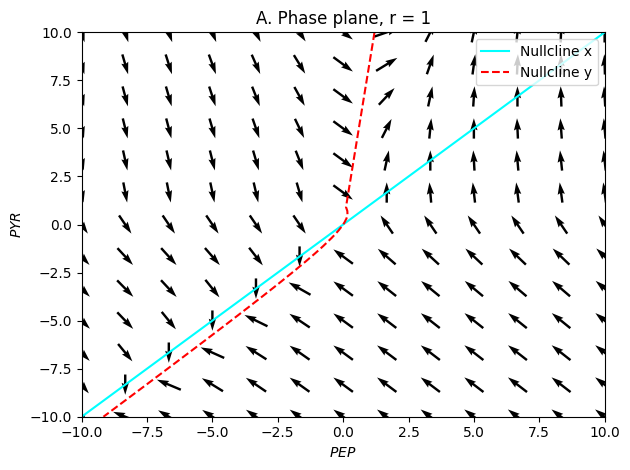

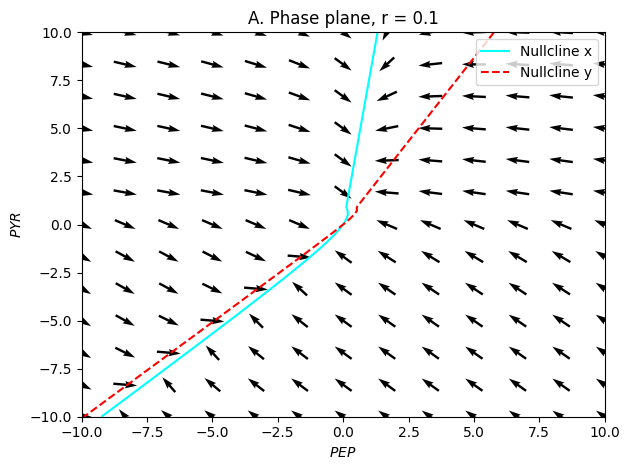

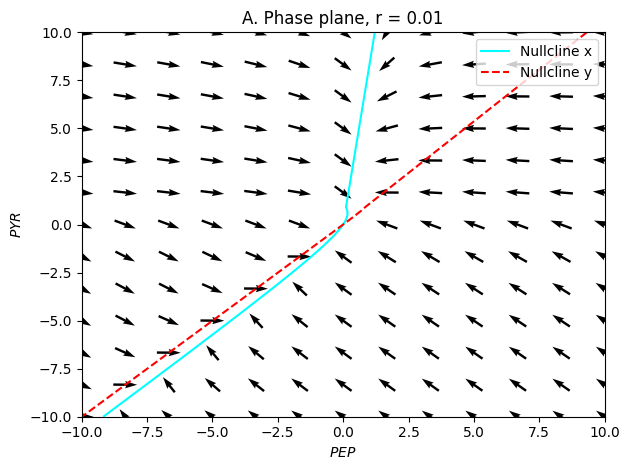

In [13]:
# ==========================================================
# Phase-plane plots for r = 1, 0.1, 0.01
# Each figure has two subplots:
#   Left:  phi = 1 - PYR
#   Right: phi = phi0
# ==========================================================

def plot_phase_planes_for_r(r_value, parameters):
    # Define axis limits
    xlim = (-10, 10)
    ylim = (-10, 10)

    # Create figure
    plt.figure()

    # Plot nullclines and phase plane
    nullclines(simplified_model, parameters, xlim, ylim)
    pplane(simplified_model, parameters, xlim, ylim)

    # Axis labels, title, limits
    plt.title(f"A. Phase plane, r = {r_value}")
    plt.xlabel("$PEP$")
    plt.ylabel("$PYR$")
    plt.xlim(xlim)
    plt.ylim(ylim)

    # Legend (if the underlying plots create labels)
    plt.legend()

    plt.tight_layout()
    plt.show()



# ==========================================================
# Run for r = 1
# ==========================================================
parameters_r1 = [1, d_fit, phi0_fit]
plot_phase_planes_for_r(1, parameters_r1)

# ==========================================================
# Run for r = 0.1
# ==========================================================
parameters_r01 = [0.1, d_fit, phi0_fit]
plot_phase_planes_for_r(0.1, parameters_r01)

# ==========================================================
# Run for r = 0.01
# ==========================================================
parameters_r001 = [0.01, d_fit, phi0_fit]
plot_phase_planes_for_r(0.01, parameters_r001)


In [14]:
def plot_phaseplane_r(r_value, d, phi0):
    parameters = (r_value, d, phi0)

    xlim = (-2, 5)
    ylim = (-2, 5)

    plt.figure(figsize=(6,5))

    nullclines(simplified_model, parameters, xlim, ylim)
    pplane(simplified_model, parameters, xlim, ylim)

    plt.title(f"Phase-plane (correct reduced model) for r = {r_value}")
    plt.xlabel("PEP")
    plt.ylabel("PYR")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.show()

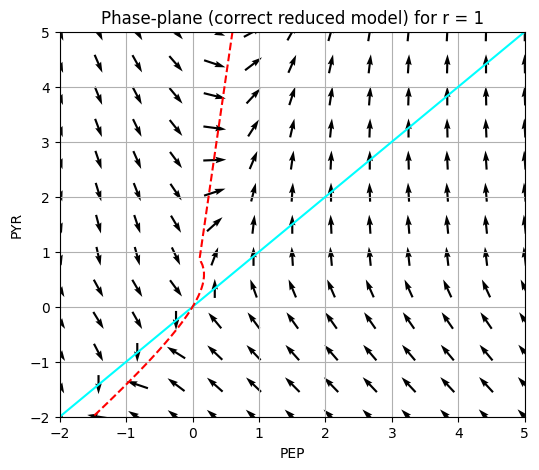

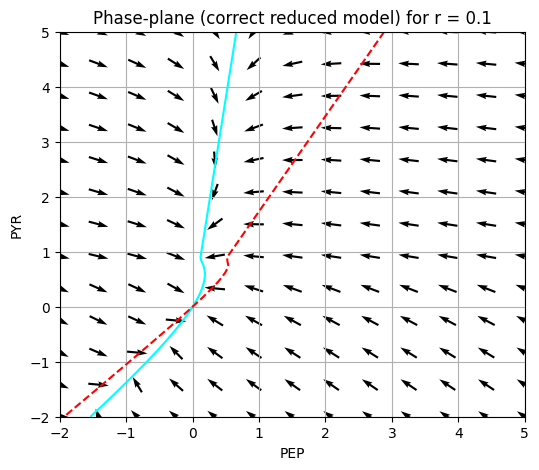

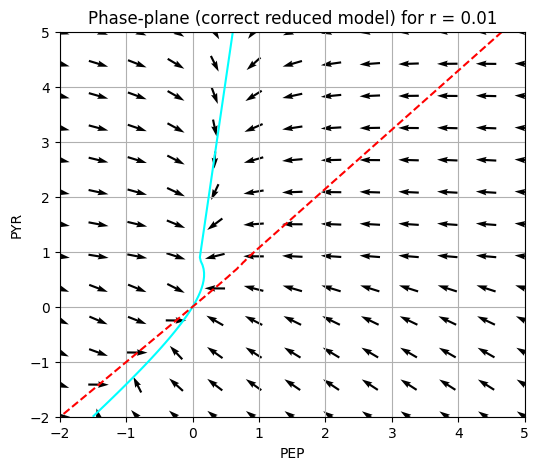

In [15]:
plot_phaseplane_r(1, d_fit, phi0_fit)
plot_phaseplane_r(0.1, d_fit, phi0_fit)
plot_phaseplane_r(0.01, d_fit, phi0_fit)